In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate

In [2]:
# read in GBM GRB catalog (first 9 years)
gbm=fits.open('/Users/jracusin/GBM/gbmgrbcat.fits')
gbm=gbm[1].data
gbm.columns

ColDefs(
    name = 'NAME'; format = 'A12'; start = 1
    name = 'RA'; format = 'F8.0'; unit = 'DEGREE'; disp = 'F8.4'; start = 14
    name = 'DEC'; format = 'F8.0'; unit = 'DEGREE'; disp = 'F8.4'; start = 23
    name = 'TRIGGER_TIME'; format = 'F15.0'; unit = 'MJD'; disp = 'F15.7'; start = 32
    name = 'T90'; format = 'F8.0'; unit = 'S'; disp = 'F8.3'; start = 48
    name = 'T90_ERROR'; format = 'F9.0'; unit = 'S'; disp = 'F9.3'; start = 57
    name = 'T90_START'; format = 'F9.0'; unit = 'S'; disp = 'F9.3'; start = 67
    name = 'FLUENCE'; format = 'F10.0'; unit = 'ERG/CM^2'; disp = 'E10.4'; start = 77
    name = 'FLUENCE_ERROR'; format = 'F13.0'; unit = 'ERG/CM^2'; disp = 'E13.4'; start = 88
    name = 'FLUX_1024'; format = 'F9.0'; unit = 'PHOTON/CM^2/S'; disp = 'F9.4'; start = 102
    name = 'FLUX_1024_ERROR'; format = 'F15.0'; unit = 'PHOTON/CM^2/S'; disp = 'F15.4'; start = 112
    name = 'FLUX_1024_TIME'; format = 'F14.0'; unit = 'S'; disp = 'F14.3'; start = 128
    name = 'FLUX_

In [3]:
## read in GBM effective area curve
def getGBMdata(gbmfile=None):
    """Reads the GBM NaI effective area file and returns a numpy array
    with two columns ``energy`` and ``aeff``.
    Parameters
    ----------
    gbmfile : string
       Name of file that contains the GBM data.
    Returns
    ----------
    gbmdata : array 
    numpy array with two columns ``energy`` and ``aeff``
    """

    from numpy import genfromtxt
    from os import path

    gbmfile = path.expandvars(gbmfile)
    
    return np.genfromtxt(gbmfile,skip_header=2,names=('energy', 'aeff'))


In [4]:
## bit of useful code for interpolating in log space
def loginterpol(x,y,x1):

    f=interpolate.interp1d(np.log10(x),np.log10(y),bounds_error=False,fill_value="extrapolate",kind='linear')
    y1=10**f(np.log10(x1))

    return y1

In [5]:
## read in the GBM Aeff
aeff_gbm=getGBMdata('/Users/jracusin/BurstCube/gitrep/Simulation/GEANT3/gbm_effective_area.dat')

In [17]:
## separate GBM short & long GRBs
w=np.where(gbm['FLUX_1024']>0)
gbm=gbm[w]
s=np.where(gbm['T90'] <= 2.)[0]
l=np.where(gbm['T90'] > 2.)[0]
m=np.where(gbm['PFLX_BEST_FITTING_MODEL'][s] == ' ')

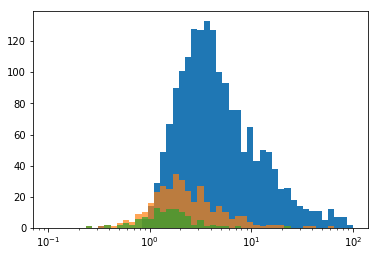

In [18]:
## plot 1s peak flux distributions - note that some are missing the spectral info, must use a template instead
##   also, most peak flux not measured on 1s timescale, but 64 ms
plot.figure()
plot.hist(gbm['FLUX_1024'][l],bins=np.logspace(np.log10(0.1),np.log10(100.0), 50))
plot.hist(gbm['FLUX_1024'][s],bins=np.logspace(np.log10(0.1),np.log10(100.0), 50),alpha=0.7)
plot.hist(gbm['FLUX_1024'][s[m]],bins=np.logspace(np.log10(0.1),np.log10(100.0), 50),alpha=0.7)
plot.xscale('log')
plot.show()

In [19]:
## read in BurstCube Aeff for various BC configurations
file='/Users/jracusin/BurstCube/BC_eff_area_curves.ecsv'
aeffs=ascii.read(file,format='ecsv')
aeffs

diameter,height,az,ze,keV,aeff,aeff_eres,aeff_eres_modfrac
float64,float64,float32,float32,float32,float32,float32,float32
90.0,22.0,0.0,0.0,50.0,55.8351,46.7395,54.6904
90.0,22.0,0.0,0.0,75.1462,59.8132,54.1071,58.5332
90.0,22.0,0.0,0.0,112.939,62.1697,58.054,60.4911
90.0,22.0,0.0,0.0,169.739,62.6373,58.1963,60.3699
90.0,22.0,0.0,0.0,255.105,56.0151,48.6771,49.7694
90.0,22.0,0.0,0.0,383.404,45.6845,32.5913,33.1395
90.0,22.0,0.0,0.0,576.227,36.94,20.04,20.3207
90.0,22.0,0.0,0.0,866.025,30.9237,12.487,25.042
90.0,22.0,0.0,0.0,1301.57,25.6741,7.79467,15.6125


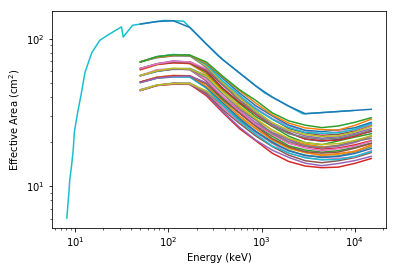

In [20]:
## grab short GRBs with peak spectral info & plot all of the Aeff curves
s=np.where((gbm['T90'] <= 2.) & (gbm['PFLX_BEST_FITTING_MODEL'] != ' '))[0]
eng=aeffs['keV']
engdiff=eng[1:]-eng[0:-1]
w=np.where(engdiff<0)[0]
nsims=len(w)
w=np.append(-1,w)#,len(eng))
for i in range(nsims):
    plot.plot(aeffs['keV'][w[i]+1:w[i+1]+1],aeffs['aeff'][w[i]+1:w[i+1]+1])
plot.xscale('log')
plot.yscale('log')
plot.xlabel('Energy (keV)')
plot.ylabel(r'Effective Area (cm$^2$)')
plot.plot(aeff_gbm['energy'],aeff_gbm['aeff'])
i=0
gbmae=loginterpol(aeff_gbm['energy'],aeff_gbm['aeff'],eng[w[i]+1:w[i+1]+1])
plot.plot(eng[w[i]+1:w[i+1]+1],gbmae)
plot.show()

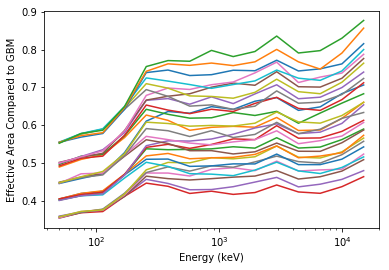

In [21]:
## plot ratio of BC Aeff to GBM Aeff
for i in range(nsims):
    gbmae=loginterpol(aeff_gbm['energy'],aeff_gbm['aeff'],eng[w[i]+1:w[i+1]+1])
    plot.plot(eng[w[i]+1:w[i+1]+1],aeffs['aeff'][w[i]+1:w[i+1]+1]/gbmae)
plot.xscale('log')
plot.xlabel('Energy (keV)')
plot.ylabel(r'Effective Area Compared to GBM')
plot.show()

In [22]:
## grab energies from thsoe curves
E=np.array(eng[w[i]+1:w[i+1]+1])
print E

[   50.        75.1462   112.939    169.739    255.105    383.404
   576.227    866.025   1301.57    1956.16    2939.97    4418.55
  6640.74    9980.54   15000.    ]


In [87]:
## For each short GRB and each BC simulation, calculate peak flux integrating peak flux spectrum
##   Scale integrated peak flux by ratio of Aeff for that sim
mo=gbm['PFLX_BEST_FITTING_MODEL'][s]
f=np.zeros([len(s),nsims])
pf=np.zeros(len(s))
outE=np.logspace(np.log10(50),np.log10(300),20)
for i in range(len(s)):
    for j in range(nsims):
        E=np.array(eng[w[j]+1:w[j+1]+1])
        AeffBC=loginterpol(E,aeffs['aeff'][w[j]+1:w[j+1]+1],outE)
        AeffGBM=loginterpol(aeff_gbm['energy'],aeff_gbm['aeff'],outE)#eng[w[j]+1:w[j+1]+1])
        Aratio=np.sqrt(AeffBC/AeffGBM)
        if mo[i]=='PFLX_PLAW':
            f[i,j]=np.trapz(gbm['PFLX_PLAW_AMPL'][s[i]]*grb_catalogs.pl(outE,gbm['PFLX_PLAW_INDEX'][s[i]])*Aratio,outE)
            pf[i]=gbm['PFLX_PLAW_PHTFLUX'][s[i]]
        if mo[i]=='PFLX_COMP':
            f[i,j]=np.trapz(gbm['PFLX_COMP_AMPL'][s[i]]*grb_catalogs.comp(outE,gbm['PFLX_COMP_INDEX'][s[i]],gbm['PFLX_COMP_EPEAK'][s[i]])*Aratio,outE)
            pf[i]=gbm['PFLX_COMP_PHTFLUX'][s[i]]
        if mo[i]=='PFLX_BAND':
            f[i,j]=np.trapz(gbm['PFLX_BAND_AMPL'][s[i]]*grb_catalogs.band(outE,gbm['PFLX_BAND_ALPHA'][s[i]],gbm['PFLX_BAND_EPEAK'][s[i]],gbm['PFLX_BAND_BETA'][s[i]])*Aratio,outE)
            pf[i]=gbm['PFLX_BAND_PHTFLUX'][s[i]]
        if mo[i]=='PFLX_SBPL':
            f[i,j]=np.trapz(gbm['PFLX_SBPL_AMPL'][s[i]]*grb_catalogs.sbpl(outE,gbm['PFLX_SBPL_INDX1'][s[i]],gbm['PFLX_SBPL_BRKEN'][s[i]],gbm['PFLX_SBPL_INDX2'][s[i]])*Aratio,outE)
            pf[i]=gbm['PFLX_SBPL_PHTFLUX'][s[i]]
        

In [92]:
## Print out the number of short GRBs scaled peak flux is above the threshold of 1 ph/cm2/s, the fraction, the sim parameters
np.shape(f)
for i in range(nsims):
#    print min(f[:,i])
    dt=gbm['Pflx_Spectrum_Stop'][s]-gbm['Pflx_Spectrum_Start'][s]
    x=np.where(f[:,i]>=1.)[0]
    print i,len(f[:,i]),len(x),len(x)/float(len(s)),aeffs['diameter'][i*15],aeffs['height'][i*15]

0 244 220 0.901639344262 90.0 22.0
1 244 226 0.926229508197 95.0 17.0
2 244 226 0.926229508197 95.0 18.0
3 244 226 0.926229508197 95.0 19.0
4 244 226 0.926229508197 95.0 20.0
5 244 226 0.926229508197 95.0 21.0
6 244 226 0.926229508197 95.0 22.0
7 244 229 0.938524590164 100.0 17.0
8 244 229 0.938524590164 100.0 18.0
9 244 229 0.938524590164 100.0 19.0
10 244 229 0.938524590164 100.0 20.0
11 244 229 0.938524590164 100.0 21.0
12 244 229 0.938524590164 100.0 22.0
13 244 207 0.848360655738 80.0 17.0
14 244 207 0.848360655738 80.0 18.0
15 244 207 0.848360655738 80.0 19.0
16 244 207 0.848360655738 80.0 20.0
17 244 207 0.848360655738 80.0 21.0
18 244 207 0.848360655738 80.0 22.0
19 244 213 0.872950819672 85.0 17.0
20 244 214 0.877049180328 85.0 18.0
21 244 214 0.877049180328 85.0 19.0
22 244 214 0.877049180328 85.0 20.0
23 244 214 0.877049180328 85.0 21.0
24 244 214 0.877049180328 85.0 22.0
25 244 219 0.897540983607 90.0 17.0
26 244 220 0.901639344262 90.0 18.0
27 244 219 0.897540983607 90.0 1

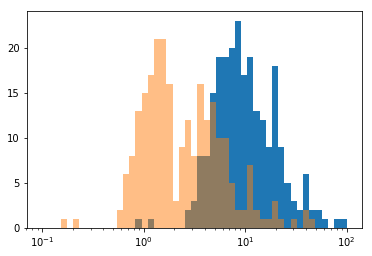

In [97]:
## plot scaled peak flux compared to 1s peak flux
plot.figure()
plot.hist(pf,bins=np.logspace(np.log10(0.1),np.log10(100.0), 50))
plot.hist(f[:,13],bins=np.logspace(np.log10(0.1),np.log10(100.0), 50),alpha=0.5)
plot.xscale('log')
plot.show()

In [96]:
w=np.where(pf <2)[0]
print gbm['PFLX_BEST_FITTING_MODEL'][s[w]]

['PFLX_PLAW' 'PFLX_PLAW']


In [74]:
gbm['Pflx_Spectrum_Stop'][s]-gbm['Pflx_Spectrum_Start'][s]

array([0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 1.024, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 1.024, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064, 0.064,
       0.064, 0.064, 0.064, 0.064, 0.064, 1.024, 0.064, 0.064, 0.064,
       0.064, 0.064,

In [91]:
max(gbm['NAME'])

'GRB170817908'